# Week 7 - Analyzing Future Development in Chinatown

### What does the most recent Housing Element tell us about plans to develop Chinatown to reach their RHNA goals?

In meeting their allocated Regional Housing Needs Assessment (RHNA) housing goals, local governments are planning strategies to further housing development where development opportunities are inhibited by land use and zoning regulations. 

The City of Los Angeles must accomodate a total of **456,643 units**, of which only **184,721 units must be afforable to lower income households.** Thus, the City has identified "Adeuqate Sites" that have been "assigned an anticipated development potential ("realistic capacity") that is well below the maximum allowable number of units for the site" which may be viewed [here](https://storymaps.arcgis.com/stories/59a896a0931346a7a94acbf9917f90b7). In other words, these sites have been identified for being "underutilized" per their designated zoning and is *not* built to their maximum capacity.

**How does this impact Los Angeles Chinatown?** Will development be distributed equitably? Will areas with large populations of low-income and people of color like Los Angeles Chinatown face the burden of greater development in their neighborhoods in the name of more housing despite the history of disinvestment in these communities?

This notebook seeks to explore "Adequate Sites" in Chinatown.

<div class="alert alert-info">
Start by importing modules to gain access to their functions for data analysis.

In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import folium

# Graphics
import matplotlib.pyplot as plt
import plotly.express as px

# for basemaps
import contextily as ctx

<div class="alert alert-info">
Import Chinatown Parcels (2021) for mapping.

In [2]:
la_neighborhoods = gpd.read_file('data/LA_Times_Neighborhood_Boundaries.zip')

In [3]:
chinatown_boundary = la_neighborhoods[la_neighborhoods['name'] == 'Chinatown']
chinatown_boundary

,OBJECTID,name,geometry
20,21,Chinatown,"POLYGON ((-118.22473 34.06758, -118.22703 34.0..."


In [4]:
# Read and add Chinatown parcels as 'chinatown_parcels'
chinatown_parcels = gpd.read_file('data/Assessor_Parcels_Data_2021_TRA.geojson')

In [5]:
chinatown_parcels.head()

,OBJECTID_1,AIN,APN,SitusHouse,SitusFract,SitusDirec,SitusUnit,SitusStree,SitusAddre,SitusCity,...,StreetDirection,StreetName,UnitNo,City,ZIPcode5,rowID,CENTER_LAT_y,CENTER_LON_y,Location 1,geometry
0,1245695.0,5414007015,5414-007-015,999,None,N,None,BROADWAY,999 N BROADWAY,LOS ANGELES CA,...,N,BROADWAY,None,LOS ANGELES CA,90012.0,20215414007015,34.066674,-118.236377,"(34.0666736, -118.23637685)","POLYGON Z ((-118.23615 34.06662 0.00000, -118...."
1,1244222.0,5406028127,5406-028-127,918,None,W,317,COLLEGE ST,918 W COLLEGE ST 317,LOS ANGELES CA,...,W,COLLEGE ST,317,LOS ANGELES CA,90012.0,20215406028127,34.066384,-118.245256,"(34.06638387, -118.2452556)","POLYGON Z ((-118.24515 34.06608 0.00000, -118...."
2,1244952.0,5409016030,5409-016-030,908,None,None,None,AVILA ST,908 AVILA ST,LOS ANGELES CA,...,None,AVILA ST,None,LOS ANGELES CA,90012.0,20215409016030,34.057580,-118.232624,"(34.05758025, -118.23262425)","POLYGON Z ((-118.23247 34.05774 0.00000, -118...."
3,1244337.0,5407007040,5407-007-040,716,None,None,A,NEW DEPOT ST,716 NEW DEPOT ST A,LOS ANGELES CA,...,None,NEW DEPOT ST,A,LOS ANGELES CA,90012.0,20215407007040,34.064934,-118.242593,"(34.06493449, -118.24259269)","POLYGON Z ((-118.24270 34.06474 0.00000, -118...."
4,1244506.0,5407022001,5407-022-001,734,None,N,None,HILL PL,734 N HILL PL,LOS ANGELES CA,...,N,HILL PL,None,LOS ANGELES CA,90012.0,20215407022001,34.062410,-118.242186,"(34.06240961, -118.24218615)","POLYGON Z ((-118.24245 34.06255 0.00000, -118...."


In [6]:
# Cleaning
columns_to_keep = ['AIN','CENTER_LAT_y', 'CENTER_LON_y', 'Location 1', 'geometry']
chinatown_parcels = chinatown_parcels[columns_to_keep]

In [7]:
# Get preview of dataset.
chinatown_parcels.head()

,AIN,CENTER_LAT_y,CENTER_LON_y,Location 1,geometry
0,5414007015,34.066674,-118.236377,"(34.0666736, -118.23637685)","POLYGON Z ((-118.23615 34.06662 0.00000, -118...."
1,5406028127,34.066384,-118.245256,"(34.06638387, -118.2452556)","POLYGON Z ((-118.24515 34.06608 0.00000, -118...."
2,5409016030,34.057580,-118.232624,"(34.05758025, -118.23262425)","POLYGON Z ((-118.23247 34.05774 0.00000, -118...."
3,5407007040,34.064934,-118.242593,"(34.06493449, -118.24259269)","POLYGON Z ((-118.24270 34.06474 0.00000, -118...."
4,5407022001,34.062410,-118.242186,"(34.06240961, -118.24218615)","POLYGON Z ((-118.24245 34.06255 0.00000, -118...."


<AxesSubplot: >

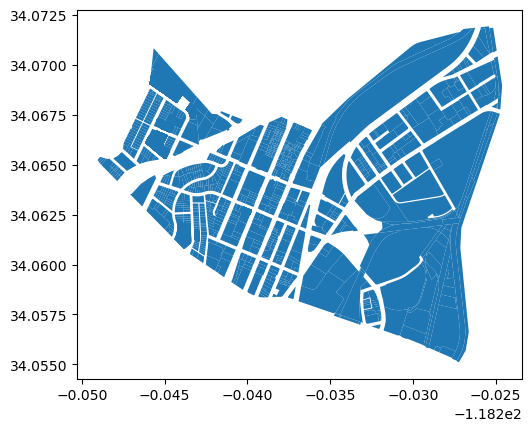

In [8]:
# Plot Chinatown parcels
chinatown_parcels.plot()

### **Appendix 4.1 - Inventory of Adequate Sites for Housing (Table A)**

According to the County of Los Angeles' most recent Housing Element, the Sites Inventory (Appendix A) is **"comprised of vacant and underutilized sites within unincorporated Los Angeles County that are zoned at appropriate densities and development standards to facilitate housing development."**

*Where are these sites in Chinatown?*

In [9]:
# Read and add excel file containing "Adequate Sites Inventory" from Appendix A
adequate_sites = pd.read_excel('data/Appendix 4.1 - Table A.xlsx')


In [10]:
adequate_sites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198113 entries, 0 to 198112
Data columns (total 30 columns):
 #   Column                                         Non-Null Count   Dtype  
---  ------                                         --------------   -----  
 0   Jurisdiction Name                              198113 non-null  object 
 1   Site Address/Intersection                      175625 non-null  object 
 2   5 Digit ZIP Code                               175625 non-null  float64
 3   Assessor Parcel Number                         198113 non-null  object 
 4   Consolidated Sites                             0 non-null       float64
 5   General Plan Designation (Current)             198097 non-null  object 
 6   Zoning Designation (Current)                   198113 non-null  object 
 7   Minimum Density Allowed (units/acre)           198113 non-null  int64  
 8   Max Density Allowed (units/acre)               197444 non-null  object 
 9   Parcel Size (Acres)                  

In [11]:
# Rename 'Assessor Parcel Number' column to 'AIN'
adequate_sites = adequate_sites.rename(columns={ 'Assessor Parcel Number':'AIN'})



In [12]:
# Cleaning the data
adequate_sites_columns = ['Site Address/Intersection',
                          'AIN',
                        'Existing Use/Vacancy',
                         'Community Plan Area',
                         'Income Category']
adequate_sites = adequate_sites[adequate_sites_columns]

In [13]:
# Preview dataset
adequate_sites.head()

,Site Address/Intersection,AIN,Existing Use/Vacancy,Community Plan Area,Income Category
0,12716 W FOOTHILL BLVD,2514005032,Residential - Single Family Residence,Arleta - Pacoima,Moderate
1,12708 W FOOTHILL BLVD,2514005033,Commercial - Office Building - One Story,Arleta - Pacoima,Moderate
2,12700 W FOOTHILL BLVD,2514005034,Industrial - Light Manufacturing - One Story,Arleta - Pacoima,Moderate
3,NaN,2514005046,Residential - Single Family Residence - Vacant...,Arleta - Pacoima,Above Moderate
4,12680 W FOOTHILL BLVD,2514005050,"Commercial - Auto, Recreation Equipment, Const...",Arleta - Pacoima,Moderate


In [14]:
# Merge dataset with Chinatown parcels to identify adequate sites in Chinatown
adequate_sites_chinatown = chinatown_parcels.merge(adequate_sites, on='AIN')

In [15]:
# Preview dataset
adequate_sites_chinatown.head()

,AIN,CENTER_LAT_y,CENTER_LON_y,Location 1,geometry,Site Address/Intersection,Existing Use/Vacancy,Community Plan Area,Income Category
0,5414007015,34.066674,-118.236377,"(34.0666736, -118.23637685)","POLYGON Z ((-118.23615 34.06662 0.00000, -118....",995 N BROADWAY,Commercial - Hotel and Motel - Motel - Under 5...,Central City North,Lower
1,5407022001,34.062410,-118.242186,"(34.06240961, -118.24218615)","POLYGON Z ((-118.24245 34.06255 0.00000, -118....",736 N HILL PL,"Residential - Double, Duplex, or Two Units - 4...",Central City North,Above Moderate
2,5414011006,34.065057,-118.238162,"(34.06505727, -118.23816209)","POLYGON Z ((-118.23809 34.06499 0.00000, -118....",NaN,Commercial - Parking Lot (Commercial Use Prope...,Central City North,Above Moderate
3,5407008008,34.065244,-118.241768,"(34.06524428, -118.24176845)","POLYGON Z ((-118.24161 34.06537 0.00000, -118....",710 W COLLEGE ST,Residential - Five or More Units or Apartments...,Central City North,Above Moderate
4,5407008008,34.065244,-118.241768,"(34.06524428, -118.24176845)","POLYGON Z ((-118.24161 34.06537 0.00000, -118....",NaN,Residential - Five or More Units or Apartments...,Central City North,Lower


Now, we can plot the data to visualize where adequate sites have been identified in Chinatown:

<AxesSubplot: >

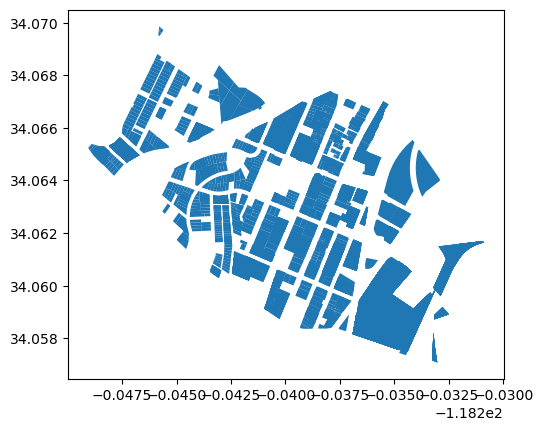

In [16]:
adequate_sites_chinatown.plot()

Compared to the original Chinatown parcels...

<AxesSubplot: >

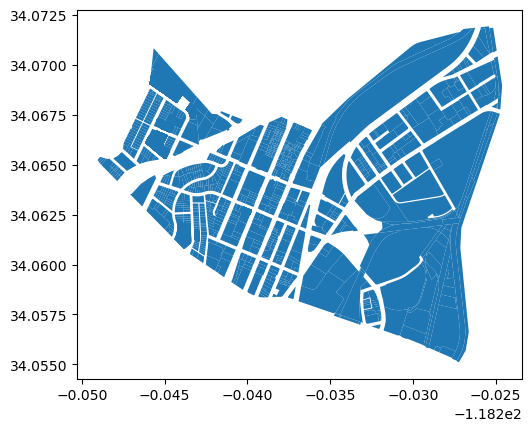

In [17]:
chinatown_parcels.plot()

This comparison shows that most sites in Chinatown have been identified as being underutilized and could become target to future policy interventions encouraging development of housing (most likely market rate) in the area.

(-118.25027919335, -118.22338680364996, 34.05426461890002, 34.072767435100076)

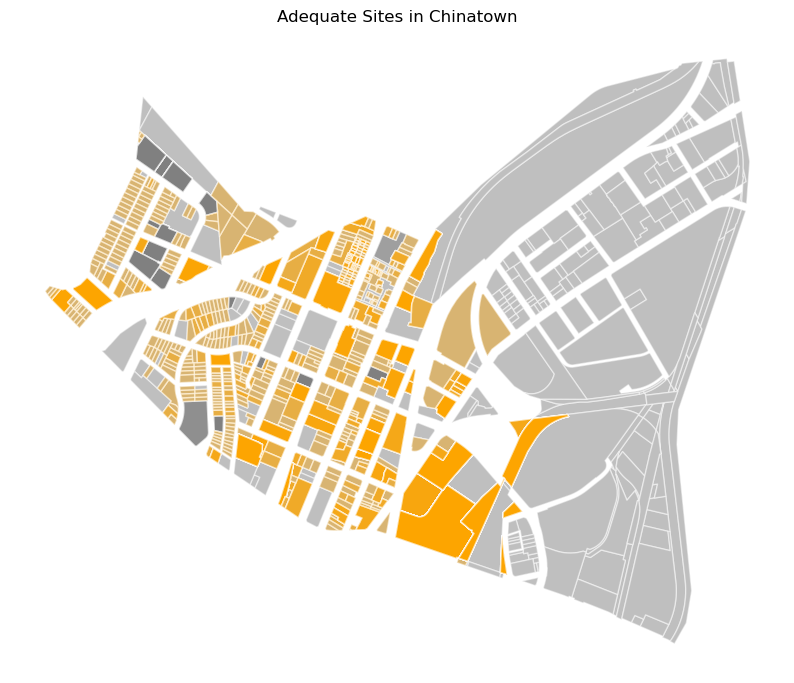

In [18]:

# set up the plot canvas with plt.subplots
fig, ax = plt.subplots(figsize=(10, 10))

# layers drawn in order laid out 

chinatown_parcels.plot(ax=ax,
                       color='gray',
                       edgecolor='white',
                       alpha=0.5)

adequate_sites_chinatown.plot(ax=ax, # this puts it in the ax plot
                              color='orange', 
                              edgecolor='white',
                              alpha=0.4)

ax.set_title('Adequate Sites in Chinatown')

# no axis
ax.axis('off')


In [33]:
m = chinatown_boundary.explore(
    tiles='CartoDB positron',
    style_kwds={
            'weight':3,
            'color': 'red',
            'fill':False,
            'opacity':1
        })
m

In [45]:

m = adequate_sites_chinatown.explore(# this defines the field to "choropleth"
        legend=True,
        cmap='RdYlGn_r', # the "_r" reverses the color
        scheme='naturalbreaks',
        tiles='CartoDB positron',
        highlight=True,
        style_kwds={
            'weight':0.5,
            'color':'lightskyblue',
            'opacity':0
        })
adqeuate_sites_chinatown_fig = chinatown_boundary.explore(
    m=m,
    tiles='CartoDB positron',
    style_kwds={
            'weight':3,
            'color': 'red',
            'fill':False,
            'opacity':1
        })

adqeuate_sites_chinatown_fig.save("adequate_sites_chinatown.html")

### **Appendix 4.7 - Candidate Sites Identified to be Rezoned to Accomodate Housing Shortfall Need (Table B)**

In [23]:
# Read and add excel file containing candidate sites for rezoning
rezone_sites = pd.read_excel('data/Appendix 4.7 - Table B.xlsx',
                             dtype = {
                                  'Assessor Parcel Number':str})


In [24]:
# Rename 'Assessor Parcel Number' column to 'AIN'
rezone_sites = rezone_sites.rename(columns={ 'Assessor Parcel Number':'AIN'})

# Cleaning the data
rezone_sites_columns = ['Site Address/Intersection',
                          'AIN',
                        'Description of Existing Uses',
                         'Community Plan Area',
                         'Income Category']
rezone_sites = rezone_sites[rezone_sites_columns]

In [25]:
rezone_sites.head()

,Site Address/Intersection,AIN,Description of Existing Uses,Community Plan Area,Income Category
0,1601 E OLYMPIC BLVD,5146009006,"Industrial - Warehousing, Distribution, Storag...",Central City,ABMI
1,777 S ALAMEDA ST,5146009008,Commercial - Store Combination - Store and Off...,Central City,ABMI
2,17941 CHATSWORTH ST,2715025055,"Commercial - Restaurant, Cocktail Lounge - Fas...",Granada Hills - Knollwood,ABMI
3,0,5133029905,"Miscellaneous - Government Owned Property, 0",Central City,ABMI
4,18000 CHATSWORTH ST,2731008023,"Commercial - Office Building - One Story, 0",Granada Hills - Knollwood,ABMI


In [26]:
# Merge dataset with Chinatown parcels to identify adequate sites in Chinatown
rezone_sites_chinatown = chinatown_parcels.merge(rezone_sites, on='AIN')

In [27]:
rezone_sites_chinatown.head()

,AIN,CENTER_LAT_y,CENTER_LON_y,Location 1,geometry,Site Address/Intersection,Description of Existing Uses,Community Plan Area,Income Category
0,5414007015,34.066674,-118.236377,"(34.0666736, -118.23637685)","POLYGON Z ((-118.23615 34.06662 0.00000, -118....",999 N BROADWAY,Commercial - Hotel and Motel - Motel - Under 5...,Central City North,"VLI, LI, ABMI"
1,5414007015,34.066674,-118.236377,"(34.0666736, -118.23637685)","POLYGON Z ((-118.23615 34.06662 0.00000, -118....",999 N BROADWAY,Commercial - Hotel and Motel - Motel - Under 5...,Central City North,"VLI, LI, ABMI"
2,5407022001,34.062410,-118.242186,"(34.06240961, -118.24218615)","POLYGON Z ((-118.24245 34.06255 0.00000, -118....",734 N HILL PL,"Residential - Double, Duplex, or Two Units - 4...",Central City North,ABMI
3,5414011006,34.065057,-118.238162,"(34.06505727, -118.23816209)","POLYGON Z ((-118.23809 34.06499 0.00000, -118....",0,Commercial - Parking Lot (Commercial Use Prope...,Central City North,ABMI
4,5407008008,34.065244,-118.241768,"(34.06524428, -118.24176845)","POLYGON Z ((-118.24161 34.06537 0.00000, -118....",714 W COLLEGE ST,Residential - Five or More Units or Apartments...,Central City North,ABMI


<AxesSubplot: >

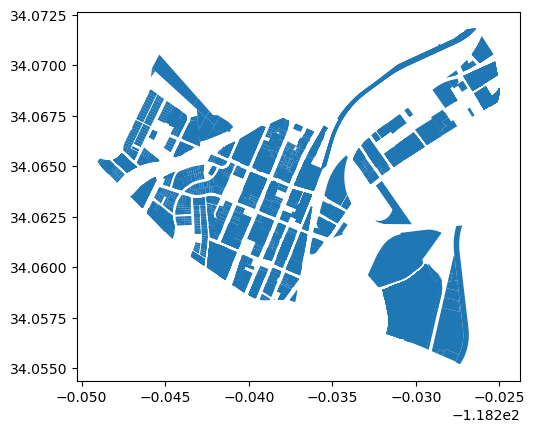

In [28]:
# Plotting candidate sites for rezoning
rezone_sites_chinatown.plot()

Compared to the original Chinatown parcels...

<AxesSubplot: >

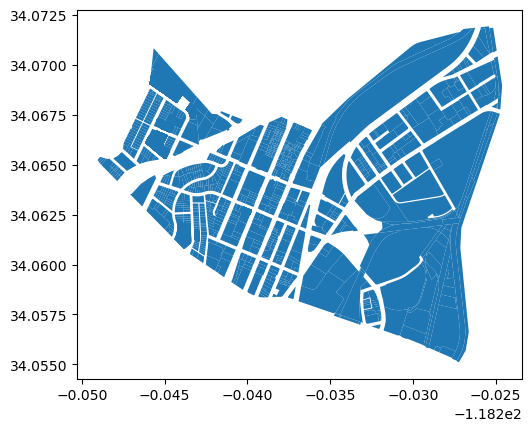

In [29]:
chinatown_parcels.plot()

This comparison shows that most of Chinatown may be considered for rezoning -- or policy implementation incentivizing development in the neighborhood.

(-118.25027919335, -118.22338680364996, 34.05426461890002, 34.072767435100076)

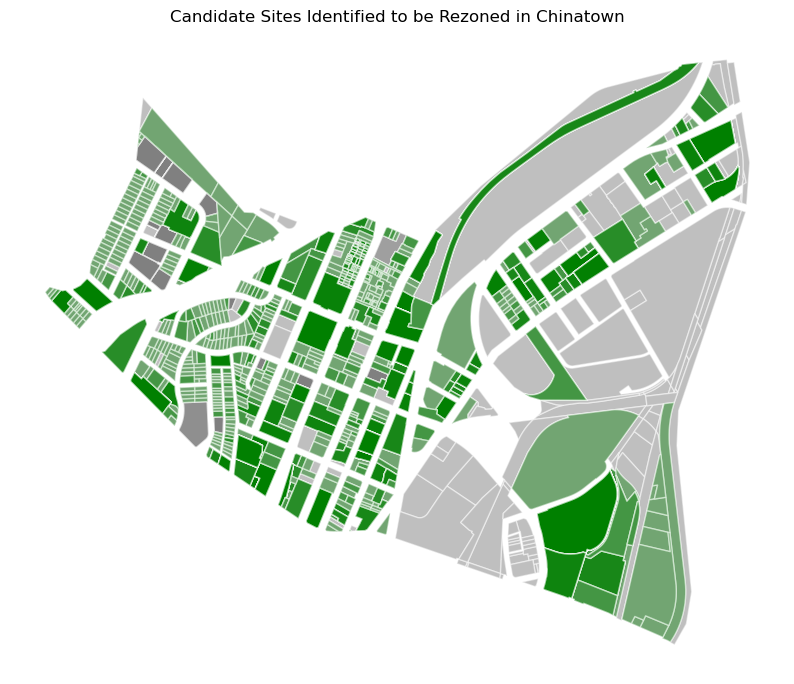

In [30]:

# set up the plot canvas with plt.subplots
fig, ax = plt.subplots(figsize=(10, 10))

# layers drawn in order laid out 

chinatown_parcels.plot(ax=ax,
                       color='gray',
                       edgecolor='white',
                       alpha=0.5)

rezone_sites_chinatown.plot(ax=ax, # this puts it in the ax plot
                              color='green', 
                              edgecolor='white',
                              alpha=0.4)

ax.set_title('Candidate Sites Identified to be Rezoned in Chinatown')

# no axis
ax.axis('off')

In [44]:
m = rezone_sites_chinatown.explore(# this defines the field to "choropleth"
        legend=True,
        #cmap='RdYlGn_r', # the "_r" reverses the color
        scheme='naturalbreaks',
        tiles='CartoDB positron',
        style_kwds={
            'weight':0.5,
            'color':'hotpink',
            'opacity':1
        })

rezone_chinatown_fig = chinatown_boundary.explore(
    m=m, # pass the map object
    tiles='CartoDB positron',
    style_kwds={
            'weight':3,
            'color': 'red',
            'fill':False,
            'opacity':1
        })

rezone_chinatown_fig.save("rezone_chinatown.html")

(-118.25027919335, -118.22338680364996, 34.05426461890002, 34.072767435100076)

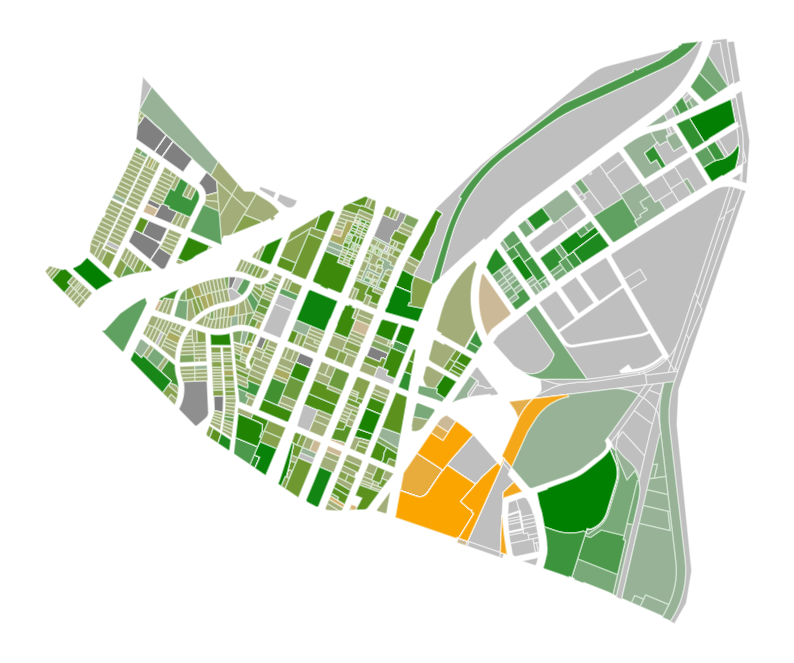

In [32]:

# set up the plot canvas with plt.subplots
fig, ax = plt.subplots(figsize=(10, 10))

# layers drawn in order laid out 

chinatown_parcels.plot(ax=ax,
                       color='gray',
                       edgecolor='white',
                       alpha=0.5)

adequate_sites_chinatown.plot(ax=ax, # this puts it in the ax plot
                              color='orange', 
                              edgecolor='white',
                              alpha=0.2)

rezone_sites_chinatown.plot(ax=ax, # this puts it in the ax plot
                              color='green', 
                              edgecolor='white',
                              alpha=0.2)

# no axis
ax.axis('off')